# Fudan PRML 23Spring Assignment1

<font color='red'>*Your Name, Student ID and Date: [Name], [Student ID], [Date]*</font>    

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.*

<font color='red' size = 3> *DDL: 2023.04.09 23:59* </font>

## 1. FDUML: your toy sklearn-like machine learning library (40 points)

In this assignment, you will fist implement your own sklearn-like machine learning library with `numpy`, named `fduml`.

sklearn: [scikit-learn: Machine Learning in Python](https://scikit-learn.org/stable/#)

In [1]:
# setup code, auto reload your .py file
%load_ext autoreload
%autoreload 2

In [1]:
# numpy
import numpy as np
np.random.seed(233)

In [2]:
# matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

You have to impletement several standard regression and classification methods in the `./fduml` folder:
1.   Logistic Regression (10 points)
2.   kNN Classification (10 points)
3.   DecisionTree Classification (10 points)
4.   Softmax Classification (10 points)

We have written most of the code for you already, and you only need to fill in the most essential parts. We have also prepared several test cases for you to check if your code works correctly.

Furthermore, you can also test the accuracy of your code by comparing its output with the output of sk-learn.

In [5]:
import sys
sys.path.append(r'C:\Users\Life_Dancer\Desktop\PRML-Spring23-FDU\assignment1\fduml')

from fduml import *

## 2. Optimization and Regularization (10 points)

To help you better understand the two fundamental concepts of `optimization` and `generalization` in machine learning, we have prepared a small experiment for you.

This section will make use of the `linear regression` algorithm that you have previously written. If you find that you need to improve your previous code to complete this section, you can go back and modify it.

**Dataset Construction**

We create a toy dataset for you sampled from the sin function (with Gaussian noise):

In [6]:
import math

# sin
def sin(x):
    y = np.sin(2 * math.pi * x)
    return y

In [7]:
def create_toy_data(func, interval, sample_num, noise = 0.0, add_outlier = False, outlier_ratio = 0.001):
    """
    generate data with the given function
    
    input:
       - func: the input function
       - interval: the range of values of x, a tuple (start, end)
       - sample_num: number of samples
       - noise: the standard deviation of Gaussian noise
       - add_outlier:whether to generate outliers
       - outlier_ratio:proportion of outliers
       
    output:
       - X: samples, shape = [n_samples,1]
       - y: labels, shape = [n_samples,1]
    """
    
    X = np.random.rand(sample_num,1) * (interval[1]-interval[0]) + interval[0]
    y = func(X)

    # add Gaussian noise
    epsilon = np.random.normal(0, noise, (sample_num,1))
    y = y + epsilon
    
    # add outlier
    if add_outlier:
        outlier_num = int(sample_num * outlier_ratio)
        if outlier_num != 0:
            outlier_idx = np.random.randint(sample_num, size = [outlier_num,1])
            y[outlier_idx] = y[outlier_idx] * 5
            
    return X, y

In [8]:
import math

# sin
def sin(x):
    y = np.sin(2 * math.pi * x)
    return y

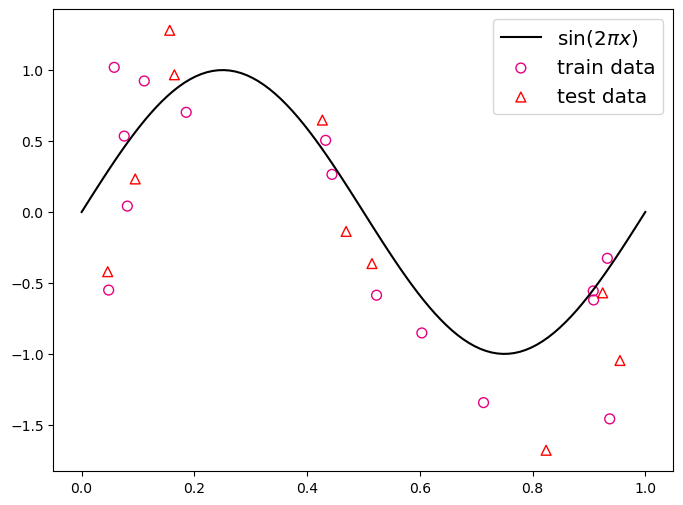

In [12]:
# generate toy dataset
func = sin
interval = (0,1)
train_num = 15
test_num = 10
noise = 0.5
X_train, y_train = create_toy_data(func=func, interval=interval, sample_num=train_num, noise = noise)
X_test, y_test = create_toy_data(func=func, interval=interval, sample_num=test_num, noise = noise)

X_underlying = np.linspace(interval[0],interval[1],num=100)
y_underlying = sin(X_underlying)

# plot
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(X_underlying, y_underlying, c='#000000', label=r"$\sin(2\pi x)$")
plt.scatter(X_train, y_train, facecolor="none", edgecolor='#e4007f', s=50, label="train data")
plt.scatter(X_test, y_test, facecolor="none", edgecolor="r", marker = '^', s=50, label="test data")
plt.legend(fontsize='x-large')
plt.show()

**Your Tasks (10 points)**

1) Take the `linear regression algorithm` you implemented with a `polynomial basis function` to implement a `polynomial regression algorithm` to fit the above training data;    
2) Test the performance of the fitted model on the training set and test set (mean squared error);      
3) Degrees of polynomials you need to try at least: 0, 1, 3, 8, 12;    
4) You should also try polynomial regression with a regularization term;   
5) You need to visualize the fitted function;

Write your implementation code below or in `fduml`, please write comments:

## 3. Machine Learning with Tabular Data (50 points)

### 1) Task Introduction

In this section, you will use the algorithms you implemented to solve more realistic tasks.

You are given a dataset of heart attack predictions. For each patient, there are some characteristics of him/her in the dataset. Your task is to build a machine learning model to predict whether he/she has heart disease based on these features.

### 2) Dataset Introduction

The training and testing datasets are in the `dataset` folder.

The following is an introduction to the attributes in the dataset:

-   Age : Age of the patient

-   Sex : Sex of the patient (1:male, 0:female)

-   cp : Chest Pain type

    -   Value 0: typical angina

    -   Value 1: atypical angina

    -   Value 2: non-anginal pain

    -   Value 3: asymptomatic

-   trtbps : resting blood pressure (in mm Hg)

-   chol: cholesterol in mg/dl fetched via BMI sensor

-   fbs: (fasting blood sugar > 120 mg/dl)

    -   1 = true

    -   0 = false

-   rest_ecg: resting electrocardiographic results

    -   Value 0: normal

    -   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    -   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

-   thalach: maximum heart rate achieved

-   exang: exercise induced angina

    -   1 = yes

    -   0 = no

-   old peak: ST depression induced by exercise relative to rest

-   slp: the slope of the peak exercise ST segment

    -   0 = unsloping

    -   1 = flat

    -   2 = downsloping

-   caa: number of major vessels (0-3)

-   thall : thalassemia

    -   0 = null

    -   1 = fixed defect

    -   2 = normal

    -   3 = reversable defect

-   output: diagnosis of heart disease (angiographic disease status)

    -   0: < 50% diameter narrowing. less chance of heart disease

    -   1: > 50% diameter narrowing. more chance of heart disease

### 3) Load Your Dataset

Different people may be assigned different datasets, please write your training dataset number here:<font color='red'> *[train0 / train1]* </font>

### 4) Exploratory Data Analysis (5 points)

Data is an important part of machine learning, and many people tend to ignore the analysis of data. In this part of the assignment, you will first conduct [exploratory data analysis (EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis) on your given dataset. More analysis is encourages. More than statistics and figures, it is better to draw some conclusions from that. 

Such analysis helps you to know the distribution of your data. Besides, it may also help you find out the **TRAPS** inside the data.
If you find any TRAPS, report the detail of them and how you will alleviate the harm they bring. You don't need to do much processing on the TRAPS here, you only need to perform statistical analysis on the data.

### 5) Build Your Baselines (15 points)

You need to use at least three algorithms of `kNN`, `decision tree`, and `logistic regression` to complete this task.

The following code may include data processing, model building, model training, model evaluation and other parts. You can also organize this part of code according to your ideas.    
You may need to build the validation set yourself.  
You can test whether your model can fit a few samples first, and then test on the full dataset.  
You may need to test the speed of the vectorized implementation of several algorithms.    
Visualization is encouraged.   
Please follow standard machine learning procedures, i.e. you CANNOT use the test set at any time to tune the parameters of the model. 

Note: *This section mainly verifies the correctness of your previous code and gets the baseline results.*

**a) kNN**

**b) Decision Tree**

**c) Logistic Regression**

### 6) Exploration (25 points)

Now that you have built your baselines, you need to improve your solution. You can do more processing on the data, improve the model, adjust the evaluation indicators, and so on. You can explore and analyze as much as you can below.

### 7) Conclusion (5 points)

Please write your conclusion here:

--------------------------

<font color='red' size = 3>🎉You have completed this assignment! We believe that through practice you have a deeper understanding of many course content, thank you for your efforts!</font>